In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/WorkSpace/AI_Research/Emotion/code/libs

/content/drive/MyDrive/WorkSpace/AI_Research/Emotion/code/libs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import get_models
import data_processing
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, ResNet50, VGG19, ResNet50V2, MobileNetV2, MobileNetV2
from keras import layers, Input
from tensorflow.keras.optimizers import Adam, Adamax
import keras
import tensorflow as tf

In [ ]:
#Import the libraries
import zipfile
import os
import shutil
import numpy as np
from imutils import paths

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/basic/Image/aligned.zip", 'r') #Opens the zip file in read mode
zip_ref.extractall('/dataset') 
zip_ref.close()

In [ ]:

data_processing.Get_raf_aligned("/dataset/aligned/","/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/basic/EmoLabel/list_patition_label.txt" )

'Get aligned!!!'

In [ ]:
list_images = np.load("/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/raf_aligned_images.npy")
labels = np.load("/content/drive/MyDrive/WorkSpace/AI_Research/datasets/RAFDB/raf_aligned_labels.npy")

In [ ]:
list_images.shape

(12271, 48, 48, 1)

In [ ]:
print(labels[0])

[0. 0. 0. 0. 1. 0. 0.]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(list_images, labels, test_size=0.2, random_state=42)

In [ ]:
aug_train = data_processing.data_augmentation(X_train)

In [ ]:
# Create input shape
img_size_target = 48
img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = layers.Concatenate()([img_input, img_input, img_input])

9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/50
153/153 [==============================] - 22s 46ms/step - loss: 1.6828 - accuracy: 0.4171 - val_loss: 4.3828 - val_accuracy: 0.1731
Epoch 2/50
153/153 [==============================] - 6s 38ms/step - loss: 1.3799 - accuracy: 0.5146 - val_loss: 2.7969 - val_accuracy: 0.4607
Epoch 3/50
153/153 [==============================] - 6s 40ms/step - loss: 1.2185 - accuracy: 0.5739 - val_loss: 1.7441 - val_accuracy: 0.4297
Epoch 4/50
153/153 [==============================] - 6s 38ms/step - loss: 1.1158 - accuracy: 0.6145 - val_loss: 1.7819 - val_accuracy: 0.5833
Epoch 5/50
153/153 [==============================] - 6s 38ms/step - loss: 1.0412 - accuracy: 0.6352 - val_loss: 1.4506 - val_accuracy: 0.6049
Epoch 6/50
153/153 [==============================] - 6s 38ms/step - loss: 1.0370 - accuracy: 0.6347 - val_loss: 1.9029 - val_accuracy: 0.5340
Epoch 7/50
153/153 [==============================] - 6s 38ms/step - loss: 0.9

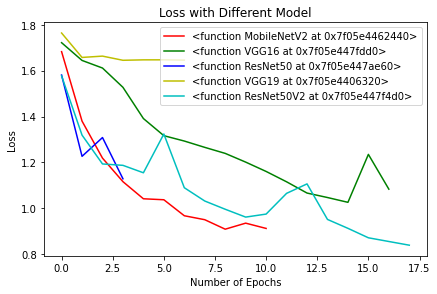

In [ ]:
from keras.callbacks import EarlyStopping
list_models = [ MobileNetV2,VGG16, ResNet50, VGG19, ResNet50V2 ] 
# models = ["VGG16", "ResNet50", "VGG19", "ResNet50V2"]
colors = ['r', 'g', 'b', 'y', 'c']

for i,name_model in enumerate(list_models):
    model = get_models.Pre_train_model(name_model, img_conc, None)
    model.compile(loss ="categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"])
    EarlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    H = model.fit(aug_train.flow(X_train, y_train, batch_size=64), steps_per_epoch=len(X_train)//64,
                                 validation_data=(X_test, y_test),validation_steps=len(X_test)//64,
                                 epochs=50, callbacks = EarlyStopping, verbose = 1)
    plt.plot(H.history['loss'], colors[i])

plt.title('Loss with Different Model')
plt.legend(list_models)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()
